# A Walk through PyStyl

Experiments in stylometry typically kick off with creating a corpus, or the collection of texts which we would like to compare. In pystyl, we use the Corpus class to represent such a text collection: 

In [37]:
%load_ext autoreload 
%autoreload 1
%matplotlib inline
from pystyl.corpus import Corpus
corpus = Corpus(language='en')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Specifying a language such as `'en'` (English) is optional. Adding texts from a directory to the corpus is easy: 

In [39]:
corpus.add_directory(directory='data/dummy')

By default, this function assumes that all texts under this directory have been encoded in UTF-8 and that they have a `.txt` extension. Additionally, the syntax of the filename should be `<category>_<title>.txt`, where category is a label indicates e.g. a text's authorship, genre or date of composition. In our case, this directory looked like:

In [40]:
ls data/dummy

Anne_Grey.txt            Charlotte_Professor.txt  Emily_Wuthering.txt
Anne_Tenant.txt          Charlotte_Shirley.txt
Charlotte_Eyre.txt       Charlotte_Villette.txt


Our corpus currently holds these 7 texts in their raw form:

In [41]:
print(corpus)

<Corpus(14 texts)> 
Untokenized texts:

	- Grey	(cat: Anne):	u'\ufeffCHAPTER I\u2014THE PARSONAGE\n<BOUN'[...]
	- Tenant	(cat: Anne):	u'\ufeffCHAPTER I\n<BOUNDARY>\nYou must'[...]
	- Eyre	(cat: Charlotte):	u'CHAPTER I\n<BOUNDARY>\nThere was'[...]
	- Professor	(cat: Charlotte):	u'CHAPTER I. INTRODUCTORY.\n<BOUN'[...]
	- Shirley	(cat: Charlotte):	u'\ufeffCHAPTER I.\n<BOUNDARY>\nLEVITIC'[...]
	- Villette	(cat: Charlotte):	u'CHAPTER I.\n<BOUNDARY>\nBRETTON.'[...]
	- Wuthering	(cat: Emily):	u'<BOUNDARY>\nCHAPTER I\n<BOUNDARY'[...]
	- Grey	(cat: Anne):	u'\ufeffCHAPTER I\u2014THE PARSONAGE\n<BOUN'[...]
	- Tenant	(cat: Anne):	u'\ufeffCHAPTER I\n<BOUNDARY>\nYou must'[...]
	- Eyre	(cat: Charlotte):	u'CHAPTER I\n<BOUNDARY>\nThere was'[...]
	- Professor	(cat: Charlotte):	u'CHAPTER I. INTRODUCTORY.\n<BOUN'[...]
	- Shirley	(cat: Charlotte):	u'\ufeffCHAPTER I.\n<BOUNDARY>\nLEVITIC'[...]
	- Villette	(cat: Charlotte):	u'CHAPTER I.\n<BOUNDARY>\nBRETTON.'[...]
	- Wuthering	(cat: Emily):	u'<BOUNDARY>\nCHA

In stylometry, it typical to preprocess your corpus and remove, let's say, punctuation and lowercase texts. In pystyl, we achieve this via the `preprocess()` method, where the `alpha_only` parameter controls whether we only wish to keep alphabetic symbols:

In [5]:
corpus.preprocess(alpha_only=True, lowercase=True)
print(corpus)

<Corpus(7 texts)> 
Untokenized texts:

	- Grey	(cat: Anne):	u'chapter ithe parsonage\nboundar'[...]
	- Tenant	(cat: Anne):	u'chapter i\nboundary\nyou must go'[...]
	- Eyre	(cat: Charlotte):	u'chapter i\nboundary\nthere was n'[...]
	- Professor	(cat: Charlotte):	u'chapter i introductory\nboundar'[...]
	- Shirley	(cat: Charlotte):	u'chapter i\nboundary\nlevitical\nb'[...]
	- Villette	(cat: Charlotte):	u'chapter i\nboundary\nbretton\nbou'[...]
	- Wuthering	(cat: Emily):	u'boundary\nchapter i\nboundary\ni '[...]


Now, the corpus is ready to be tokenized, which is helpful if we want to start counting words:

In [6]:
corpus.tokenize()
print(corpus)

<Corpus(7 texts)> 
Tokenized texts:
	- Grey	(cat: Anne):	u'chapter ithe parsonage boundary all true histories contain instruction though'[...]
	- Tenant	(cat: Anne):	u'chapter i boundary you must go back with me to'[...]
	- Eyre	(cat: Charlotte):	u'chapter i boundary there was no possibility of taking a'[...]
	- Professor	(cat: Charlotte):	u'chapter i introductory boundary the other day in looking over'[...]
	- Shirley	(cat: Charlotte):	u'chapter i boundary levitical boundary of late years an abundant'[...]
	- Villette	(cat: Charlotte):	u'chapter i boundary bretton boundary my godmother lived in a'[...]
	- Wuthering	(cat: Emily):	u'boundary chapter i boundary i have just returned from a'[...]


The corpus now holds our texts in a tokenized form. Of course, the novels wildly vary in length. If we would like to split these into shorter segments of e.g. 10,000 words, we can use the `segment()` function.

In [7]:
corpus.segment(segment_size=20000)
print(corpus)

<Corpus(48 texts)> 
Tokenized texts:
	- Grey_1	(cat: Anne):	u'chapter ithe parsonage boundary all true histories contain instruction though'[...]
	- Grey_2	(cat: Anne):	u'or neglected to perform her promise and doubting whether to'[...]
	- Grey_3	(cat: Anne):	u'was so terribly afraid of papa seeing him boundary has'[...]
	- Tenant_1	(cat: Anne):	u'chapter i boundary you must go back with me to'[...]
	- Tenant_2	(cat: Anne):	u'and i grew weary of amusing her i felt myself'[...]
	- Tenant_3	(cat: Anne):	u'and i returned to my business boundary but i soon'[...]
	- Tenant_4	(cat: Anne):	u'lover and ill leave all the sir herberts and valentines'[...]
	- Tenant_5	(cat: Anne):	u'shall see come i am in hells torments till you'[...]
	- Tenant_6	(cat: Anne):	u'inextricably entangled in the snare of my antagonist boundary check'[...]
	- Tenant_7	(cat: Anne):	u'the subject ask mr hargrave boundary at this they simultaneously'[...]
	- Tenant_8	(cat: Anne):	u'fingers so marvellously like her own con

In stylometry, it is common to manually remove certain words, such as personal pronouns, which are more strongly tied to narrative perspective than authorial writing style. To remove these from our English texts, we can do:

In [8]:
corpus.remove_tokens(rm_pronouns=True)
print(corpus)

<Corpus(48 texts)> 
Tokenized texts:
	- Grey_1	(cat: Anne):	u'chapter ithe parsonage boundary all true histories contain instruction though'[...]
	- Grey_2	(cat: Anne):	u'or neglected to perform promise and doubting whether to keep'[...]
	- Grey_3	(cat: Anne):	u'was so terribly afraid of papa seeing boundary has been'[...]
	- Tenant_1	(cat: Anne):	u'chapter boundary must go back with to the autumn of'[...]
	- Tenant_2	(cat: Anne):	u'and grew weary of amusing felt drawn by an irresistible'[...]
	- Tenant_3	(cat: Anne):	u'and returned to business boundary but soon began to regret'[...]
	- Tenant_4	(cat: Anne):	u'lover and ill leave all the sir herberts and valentines'[...]
	- Tenant_5	(cat: Anne):	u'shall see come am in hells torments till speak the'[...]
	- Tenant_6	(cat: Anne):	u'inextricably entangled in the snare of antagonist boundary check cried'[...]
	- Tenant_7	(cat: Anne):	u'the subject ask mr hargrave boundary at this simultaneously burst'[...]
	- Tenant_8	(cat: Anne):	u'finger

As you can see, all personal pronouns have now been removed from our corpus segments. We are now ready to `vectorize` our corpus, which means that we will represent it as as a large two-dimensional matrix in which each row represents one of our textual segments, and each individual feature (e.g. a function word frequency) is represented in a column.  

In [9]:
corpus.vectorize(mfi=100)

[u'a',
 u'about',
 u'after',
 u'again',
 u'all',
 u'am',
 u'an',
 u'and',
 u'any',
 u'are',
 u'as',
 u'at',
 u'be',
 u'been',
 u'before',
 u'boundary',
 u'but',
 u'by',
 u'can',
 u'come',
 u'could',
 u'day',
 u'did',
 u'do',
 u'dont',
 u'down',
 u'for',
 u'from',
 u'go',
 u'good',
 u'had',
 u'hand',
 u'has',
 u'have',
 u'how',
 u'if',
 u'in',
 u'into',
 u'is',
 u'it',
 u'its',
 u'know',
 u'like',
 u'little',
 u'long',
 u'made',
 u'might',
 u'miss',
 u'more',
 u'mr',
 u'mrs',
 u'much',
 u'must',
 u'never',
 u'no',
 u'not',
 u'now',
 u'of',
 u'on',
 u'one',
 u'only',
 u'or',
 u'other',
 u'out',
 u'over',
 u'own',
 u'said',
 u'say',
 u'see',
 u'seemed',
 u'shall',
 u'should',
 u'so',
 u'some',
 u'still',
 u'such',
 u'than',
 u'that',
 u'the',
 u'then',
 u'there',
 u'think',
 u'this',
 u'thought',
 u'time',
 u'to',
 u'too',
 u'up',
 u'very',
 u'was',
 u'well',
 u'were',
 u'what',
 u'when',
 u'which',
 u'who',
 u'will',
 u'with',
 u'would',
 u'yet']

As you can see, we have now included the 30 most common words in our corpus model (`mfi` stands for 'most frequent items'). These features are returned by the `vectorize()` method. Many other options are available; to extract the 50 most common character trigrams, for instance, you could run:

In [8]:
corpus.vectorize(mfi=20, ngram_type='char', ngram_size=3)

[u' an',
 u' bo',
 u' in',
 u' of',
 u' th',
 u' to',
 u'and',
 u'as ',
 u'ed ',
 u'er ',
 u'he ',
 u'ing',
 u'nd ',
 u'ng ',
 u'of ',
 u'oun',
 u'ry ',
 u'the',
 u'to ',
 u'und']

A more fundamental issue is the vectorization model we select. By default, the vectorizer will create a simple term-frequency model, which means that we will record the relative frequencies of our most frequent items in each text. In stylometry, however, there exist many more models. PyStyl also supports the `tf-idf` model (term frequency-inverse document frequency), which is commonly used in information retrieval to assign more weight to lower-frequency items. 

In [11]:
corpus.vectorize(mfi=30, vector_space='tf_idf')

[u'a',
 u'all',
 u'and',
 u'as',
 u'at',
 u'be',
 u'boundary',
 u'but',
 u'by',
 u'for',
 u'from',
 u'had',
 u'have',
 u'in',
 u'is',
 u'it',
 u'no',
 u'not',
 u'of',
 u'on',
 u'or',
 u'so',
 u'that',
 u'the',
 u'this',
 u'to',
 u'was',
 u'were',
 u'with',
 u'would']

PyStyl also supports the `std` model which underpins Burrows's famous Delta method (and which is typically also a solid model for other applications): 

In [12]:
corpus.vectorize(mfi=30, vector_space='tf_std')

[u'a',
 u'all',
 u'and',
 u'as',
 u'at',
 u'be',
 u'boundary',
 u'but',
 u'by',
 u'for',
 u'from',
 u'had',
 u'have',
 u'in',
 u'is',
 u'it',
 u'no',
 u'not',
 u'of',
 u'on',
 u'or',
 u'so',
 u'that',
 u'the',
 u'this',
 u'to',
 u'was',
 u'were',
 u'with',
 u'would']

Vectorization is a foundational issue in stylometry, since it very much controls how our analyses 'see' texts. Luckily, the vectorize() method comes with many options to control this process. With the following options, we can for install control the proportion of segments to control in how many segments a feature should minimally occur (a procedure also known as 'culling'): 

In [11]:
corpus.vectorize(mfi=30, min_df=0.80)

[u'a',
 u'all',
 u'and',
 u'as',
 u'at',
 u'be',
 u'boundary',
 u'but',
 u'by',
 u'for',
 u'from',
 u'had',
 u'have',
 u'in',
 u'is',
 u'it',
 u'no',
 u'not',
 u'of',
 u'on',
 u'or',
 u'so',
 u'that',
 u'the',
 u'this',
 u'to',
 u'was',
 u'were',
 u'with',
 u'would']

In [10]:
from pystyl.analysis import distance_matrix, hierarchical_clustering

In [11]:
from pystyl.visualization import scatterplot, scatterplot_3d

In [12]:
from pystyl.analysis import pca

In [13]:
pca_coor, pca_loadings = pca(corpus, nb_dimensions=2)

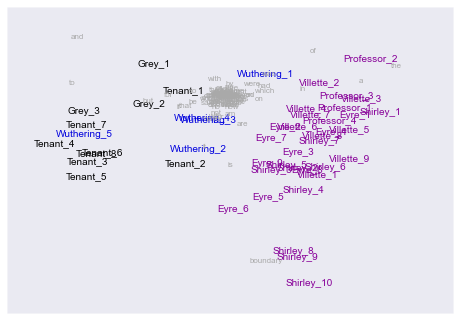

In [14]:
scatterplot(corpus, coor=pca_coor, nb_clusters=0, loadings=pca_loadings, plot_type='static',\
           save=False, show=False, return_svg=False, outputfile="/Users/mike/Desktop/pca.pdf")

In [15]:
pca_coor, pca_loadings = pca(corpus, nb_dimensions=3)

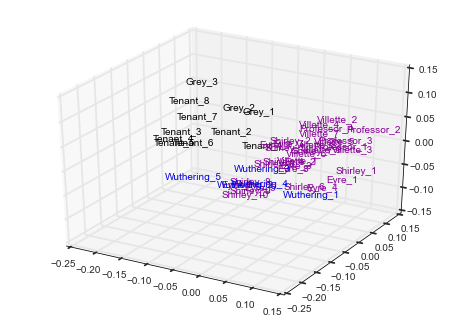

In [16]:
scatterplot_3d(corpus, coor=pca_coor, outputfile="/Users/mike/Desktop/3d.pdf",\
           save=True, show=False, return_svg=False)

In [17]:
from pystyl.analysis import distance_matrix

In [18]:
dm = distance_matrix(corpus, 'minmax')

In [19]:
from pystyl.visualization import clustermap

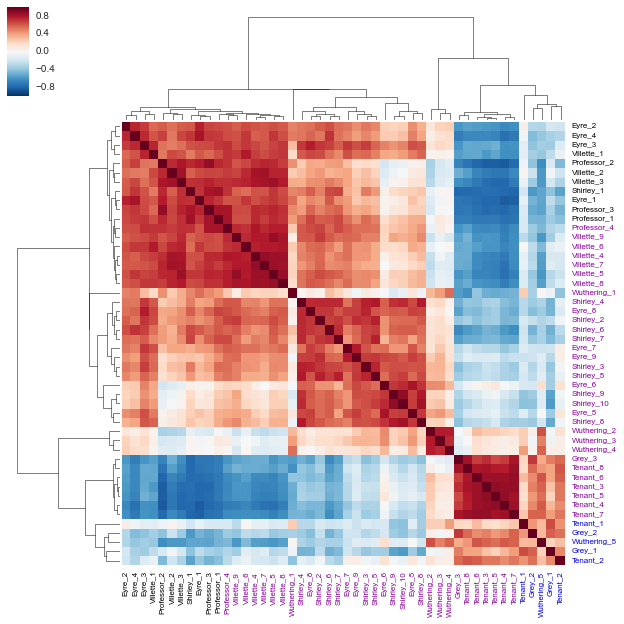

In [21]:
clustermap(corpus, distance_matrix=dm, fontsize=8, color_leafs=True,\
           outputfile='/Users/mike/Desktop/cm.pdf',
          show=False, save=False, return_svg=False)

In [22]:
from pystyl.analysis import hierarchical_clustering

In [23]:
cluster_tree = hierarchical_clustering(dm, linkage='ward')

In [24]:
from pystyl.visualization import scipy_dendrogram, ete_dendrogram

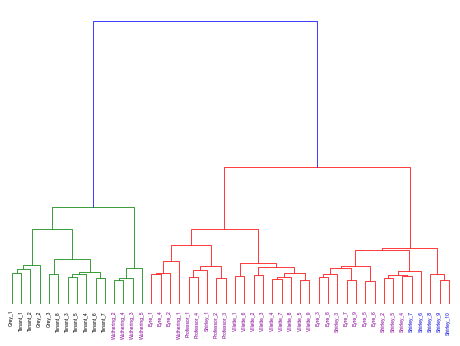

In [32]:
scipy_dendrogram(corpus=corpus, tree=cluster_tree, outputfile='~/Desktop/scipy_dendrogram.pdf',\
                 fontsize=5, color_leafs=True, show=False, save=F, return_svg=False)

In [35]:
ete_dendrogram(corpus=corpus, tree=cluster_tree, outputfile='~/Desktop/ete_dendrogram.png',\
                 fontsize=5, color_leafs=True, show=False, save=True, return_svg=False,
              save_newick=False)

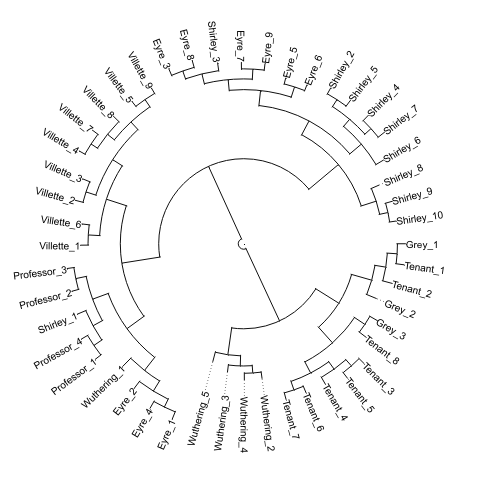

In [36]:
from IPython.display import Image
Image(filename='/Users/mike/Desktop/ete_dendrogram.png')